# Data Cleaning Project
http://archive.ics.uci.edu/ml/datasets/heart+Disease
## Here I will attempt to clean the raw data from the Cleveland Heart Disease Data Set. It can be found at  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

### The data is space delimited and contains 76 attributes, of which we will only consider 14. They are as follows:

1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute)

 The 75th attribute in the uncleaned data set is a patient name which has since been redacted for patient anonymity. I will use this 75th attribute which is always 'name' as a point at which to "cut" and begin a new patient row. There is some data past this semi-ordered name structure which is nonesensical and will not be used. For missing values, I will likely impute the median or mean, whichever makes more logical sense given the context of the attribute.

### Read in the data, store into a dataframe, and convert categorical variables

In [4]:
'''
List of available variables:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
'''



%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint


# Create Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df = pd.read_table("Semi_Scrubbed.csv", sep=',', header=None, names=columns)


#We will now scrap rows with missing data since there are not too many

df = df[df['ca'] != '?']
df = df[df['thal'] != '?']




In [5]:
df
#Data is cleaned and ready for analysis!

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Data Story Telling

## Can you count something interesting?

### With 14 variables to work with, there are many interesting things we can count. For example, we can count the numbers of people with varying degrees of disease. As is hoped and thankfully, there are less and less as heart disease gets progressively worse. See cell DST1

## Can you find some trends (high, low, increase, decrease, anomalies)?

## Can you make a bar plot or a histogram?

## Can you compare two related quantities?

## Can you make a scatterplot?

### Yes to all, and pandas profiling package will do this for us.

## Can you make a time-series plot?

### There is no time series data in this dataset, so no.  

In [6]:
#Generate Pandas Profile to get general sense of Data

import pandas_profiling

pandas_profiling.ProfileReport(df)

C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,15
Number of observations,297
Total Missing (%),0.0%
Total size in memory,34.9 KiB
Average record size in memory,120.3 B
Numeric,13
Categorical,2
Date,0
Text (Unique),0
Rejected,0
Distinct count,41


## From this profile report we see that attributes 'ca' and 'thal' are read in a categorical, despite being easily converted to numeric. We will do this with the pd.to_numeric fxn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000096E5849E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000096EA74F828>]], dtype=object)

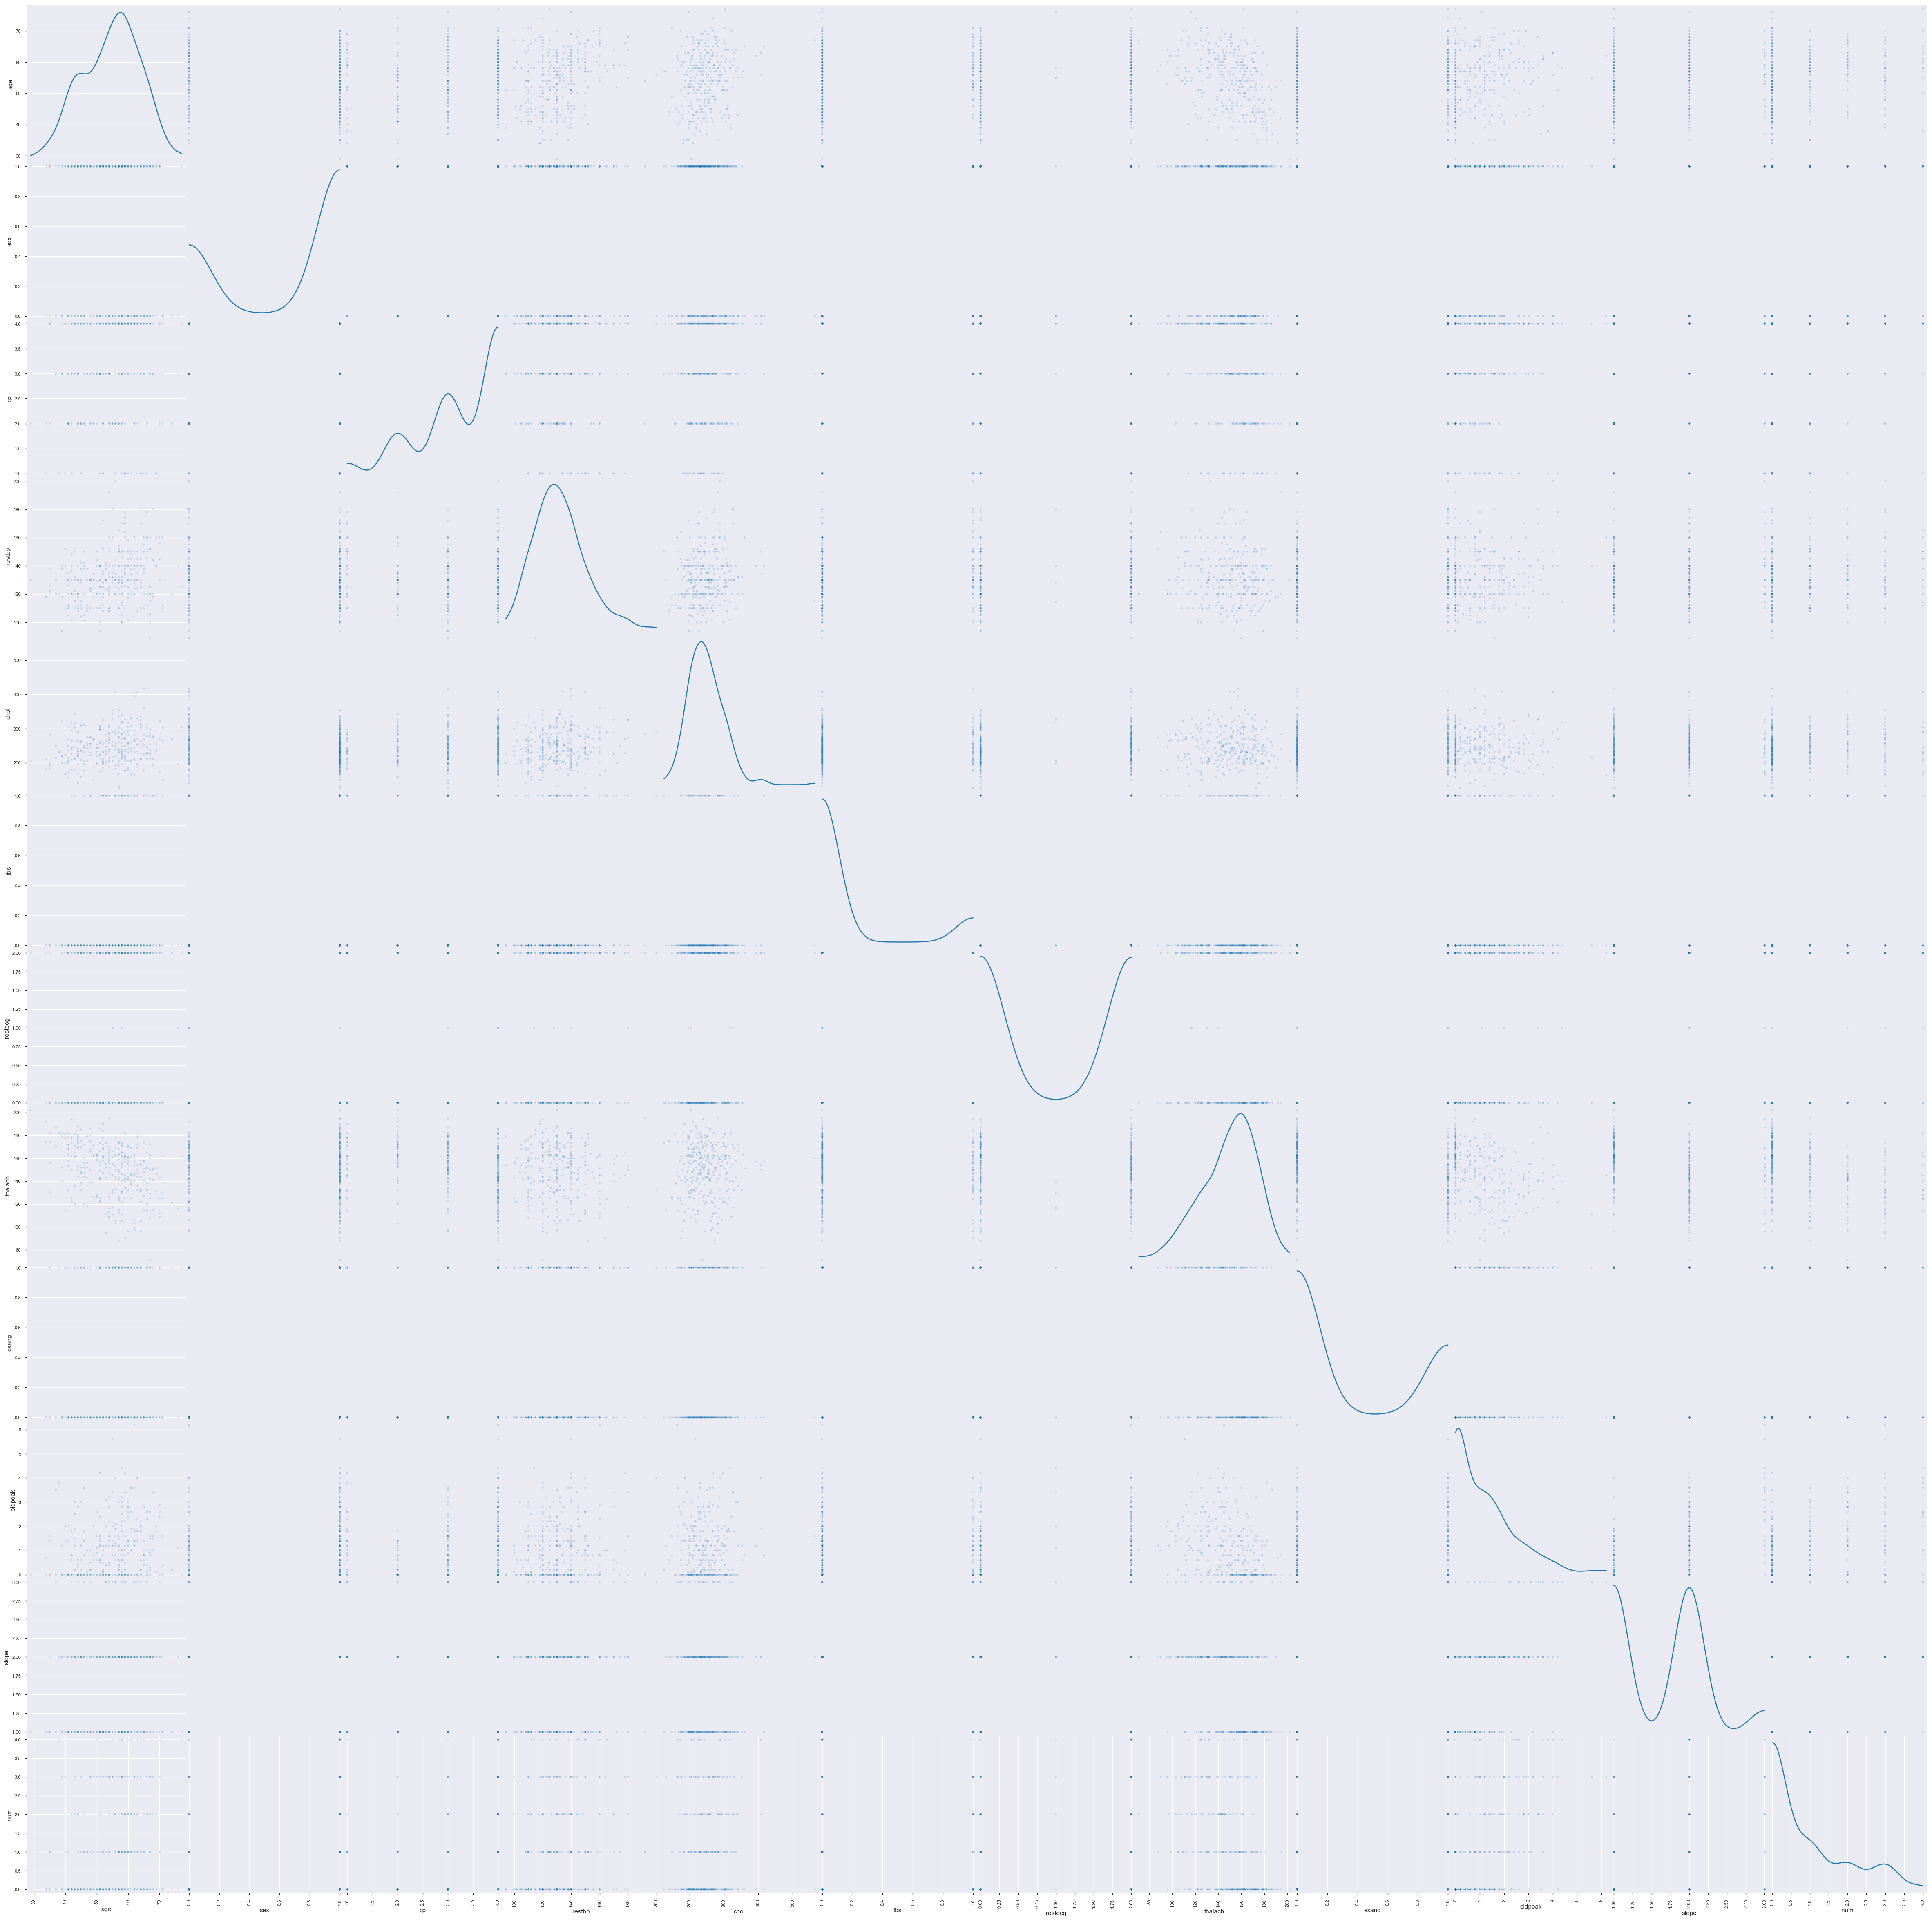

In [7]:
#Scatter matrix of all attributes vs all others. Diagonal gives kernel density estimation of that attrib instead of
#plotting uselessly vs itself

#needs some cleanup - increase size to massive?

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(60,60), diagonal='kde')

0    160
1     54
3     35
2     35
4     13
Name: num, dtype: int64


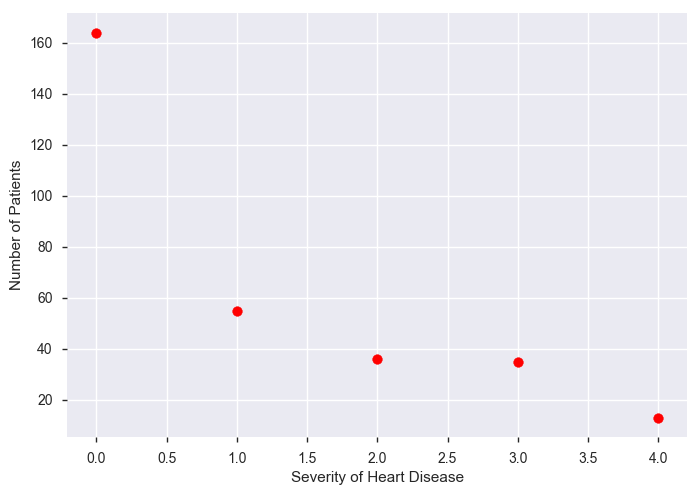

In [8]:
# Simple scatter showing number of patients with each severity of heart disease
print(df['num'].value_counts())
plt.scatter([0,1,2,3,4],[164,55,36,35,13],color='red')
plt.ylabel('Number of Patients')
plt.xlabel('Severity of Heart Disease')
plt.show()
#Can already see in pandas profile

In [9]:
#STATS GOES HERE

In [10]:
#MACHINE LEARNING GOES HERE


In [11]:


X_train = df
X_scaled = preprocessing.scale(X_train)
X_scaled 

NameError: name 'preprocessing' is not defined

In [ ]:
from sklearn import preprocessing

input_data = df

# Print mean and standard deviation
print("\nBEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))

# Remove mean
data_scaled = preprocessing.scale(input_data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))

#We have removed the mean from the values - What does this do to categorical?


# Min max scaling
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)

# Normalize data
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)

# Sample input labels
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)


# Print the mapping
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)
    
# Encode a set of labels using the encoder
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))


# Decode a set of values using the encoder
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list(decoded_list))







In [ ]:
from sklearn import linear_model

def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    
# Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01
# Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size),
np.arange(min_y, max_y, mesh_step_size))
    
    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    
    
    # Create a plot
    plt.figure()
    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black',
linewidth=1, cmap=plt.cm.Paired)
    
    
    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1),
1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1),
1.0)))
    plt.show()


    
# Define sample input data

#X = df
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df.thal)
df.thal = le.transform(df.thal)
features = df.columns[:-1]
y = np.array(df.num)


# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)


# Train the classifier
classifier.fit(np.array(df[features]), y)


# Visualize the performance of the classifier
visualize_classifier(classifier, np.array(df[features]), y)


In [ ]:

reg = linear_model.Lasso(alpha = 0.1)
reg.fit(df,df['num'])


reg.predict(df)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib


y = df.num
X = df.drop('num', axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

X_train_scaled = preprocessing.scale(X_train)



scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))


hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}


clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)



print(clf.best_params_)



print(clf.refit)



y_pred = clf.predict(X_test)

print(r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

In [ ]:
# Select the best split point for a dataset
def get_split(df, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Random Forest Algorithm on Sonar Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt



# Random Forest Algorithm on Sonar Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset
def get_split(dataset, n_features):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left, n_features)
		split(node['left'], max_depth, min_size, n_features, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right, n_features)
		split(node['right'], max_depth, min_size, n_features, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
	root = get_split(train, n_features)
	split(root, max_depth, min_size, n_features, 1)
	return root

# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
	sample = list()
	n_sample = round(len(dataset) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset))
		sample.append(dataset[index])
	return sample

# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
	predictions = [predict(tree, row) for tree in trees]
	return max(set(predictions), key=predictions.count)

# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)

# Test the random forest algorithm
seed(2)
# load and prepare data

dataset = df
# convert string attributes to integers
for i in range(0, len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
	scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	print('Trees: %d' % n_trees)
	print('Scores: %s' % scores)
	print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

## Random Forest Classifier

In [ ]:

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(42)

In [12]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
#df.head()

# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]


# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 212
Number of observations in the test data: 85


In [18]:
# Create a list of the feature column's names
features = df.columns[:13]

# View features
features

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [23]:
y = train['num']

# View target
#y

In [24]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1], dtype=int64)

In [26]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 0.5,  0. ,  0.2,  0.1,  0.2],
       [ 0.1,  0.3,  0.2,  0.2,  0.2],
       [ 0.6,  0.2,  0. ,  0.1,  0.1],
       [ 0.8,  0.1,  0. ,  0.1,  0. ],
       [ 0.8,  0.2,  0. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ,  0. ,  0. ],
       [ 0.8,  0. ,  0.1,  0. ,  0.1],
       [ 0. ,  0.3,  0.1,  0.6,  0. ],
       [ 0.4,  0.5,  0.1,  0. ,  0. ],
       [ 0.8,  0.2,  0. ,  0. ,  0. ]])

0    0
1    2
0    0
0    0
0    0
Name: num, dtype: int64

In [32]:
# Create confusion matrix
pd.crosstab(test['num'], clf.predict(test[features]), rownames=['Actual Nums'], colnames=['Predicted Num'])

Predicted Num,0,1,2,3
Actual Nums,,,,
0,43,4,0,0
1,10,0,1,2
2,5,5,0,1
3,3,5,1,2
4,0,0,1,2


In [33]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('age', 0.096019991885657657),
 ('sex', 0.027446681439506286),
 ('cp', 0.084630376919252653),
 ('restbp', 0.1250531215483664),
 ('chol', 0.10535959194787196),
 ('fbs', 0.017819602591483037),
 ('restecg', 0.039901771376544423),
 ('thalach', 0.14608107962554742),
 ('exang', 0.067859669078455392),
 ('oldpeak', 0.11179460951714067),
 ('slope', 0.043556297869090439),
 ('ca', 0.055973396262822453),
 ('thal', 0.07850380993826124)]